Выполнил: Бешляга Григорий Константинович

##EDA (исследовательский анализ данных)


Интерпретируем признаки нашего датасета:


*   id: уникальный идентификатор алмаза
*   carat: вес алмаза в каратах
*   cut: качество огранки алмаза (например, "Ideal", "Premium", "Good")
*   clarity: чистота алмаза (например, "IF" - без включений, "VVS1" - очень, очень мелкие включения)
*   color: цвет алмаза (например, от "D" - безцветный до "Z" - наиболее желтый)
*   depth: глубина алмаза в процентах
*   table: ширина верхней грани алмаза в процентах
*   x, y, z: размеры алмаза в мм
*   theta1, theta2: дополнительные характеристики алмаза

Для выяснения их значимости между собой, а также исследования зависимости между ними, построим матрицу корреляции признаков:

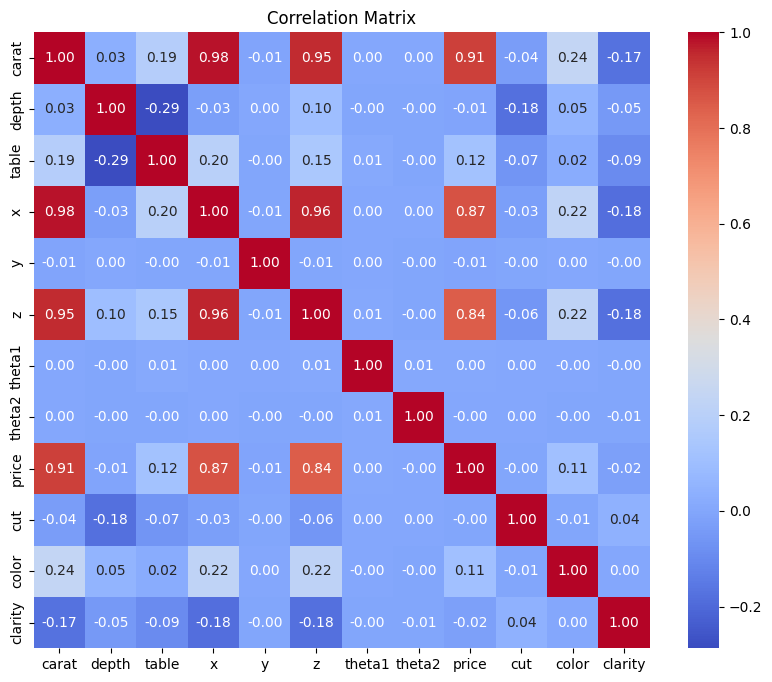

In [ ]:
# exploratory data analysis
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Установка seed для воспроизводимости
seed = 42
np.random.seed(seed)

# Загрузка данных для обучающей выборки
train_data = pd.read_csv('train.csv')

# Обработка NaN значений в обучающей выборке
train_data = train_data.dropna()

# Выбор числовых признаков для анализа
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z','theta1','theta2','price']

# Выбор категориальных признаков для анализа
categorical_features = ['cut', 'color', 'clarity']

# Преобразование категориальных признаков в числовые
label_encoder = LabelEncoder()
for feature in categorical_features:
    train_data[feature] = label_encoder.fit_transform(train_data[feature])

# Создание корреляционной матрицы
correlation_matrix = train_data[numeric_features + categorical_features].corr()

# Создание графической корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

Как мы видим на итоговую цену алмаза сильно влияют признаки:
*   carat
*   x
*   z

Слабо влияют:
*   table
*   color

Почти или вовсе не влияют:
*   depth
*   y
*   theta1
*   theta2
*   cut
*   clarity



#Preprocessing (подготовка данных)
В код добавим загрузку данных из файла, сид, обработку NaN значений и преобразование категориальных признаков в количественные с помощью one-hot encoding


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR


my_seed = 228 # любое целое число на ваш выбор
random.seed(my_seed)
np.random.seed(my_seed)

# Загрузка данных для обучающей выборки
train_data = pd.read_csv('train.csv')

# Загрузка данных для тестовой выборки
test_data = pd.read_csv('test.csv')

# Обработка NaN значений в обучающей выборке
train_data = train_data.dropna()

# Обработка NaN значений в тестовой выборке
test_data = test_data.dropna()


# Выделение признаков и целевой переменной
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'theta1', 'theta2']
target = 'price'


# Разделение данных на признаки (X) и целевую переменную (y) для обучающей выборки
X_train = train_data[features]
y_train = train_data[target]

# Разделение данных на признаки (X) для тестовой выборки
X_test = test_data[features]

# Преобразование категориальных признаков в числовые с помощью one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

#Model & training (Выбор модели и её обучение)

**Эксперимент 1**

Создадим простую линейную регрессию без любых добавлений

In [ ]:
# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 693.1445146798729


**Эксперимент 2**

Добавим L2 регуляризацию и поиграем с гиперпараметром

In [ ]:
# Создание и обучение модели линейной регрессии
model = Ridge(alpha = 0.5)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 693.2885507256797


In [ ]:
# Создание и обучение модели линейной регрессии
model = Ridge(alpha = 0.75)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 693.3616041035361


In [ ]:
# Создание и обучение модели линейной регрессии
model = Ridge(alpha = 0.25)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 693.2162004847023


In [ ]:
# Создание и обучение модели линейной регрессии
model = Ridge(alpha = 0.01)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 693.1473745074356


Стало только хуже ❄ ☹

**Эксперимент 3**

Теперь добавим L1 регуляризацию

In [ ]:
# Создание и обучение модели линейной регрессии
model = Lasso(alpha = 0.5)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 692.3924528008083


In [ ]:
# Создание и обучение модели линейной регрессии
model = Lasso(alpha = 0.25)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 692.7548214127748


In [ ]:
# Создание и обучение модели линейной регрессии
model = Lasso(alpha = 1)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 691.7651309420363


In [ ]:
# Создание и обучение модели линейной регрессии
model = Lasso(alpha = 5)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 690.773911676103


In [ ]:
# Создание и обучение модели линейной регрессии
model = Lasso(alpha = 10)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 700.1265908179271


In [ ]:
# Создание и обучение модели линейной регрессии
model = Lasso(alpha = 4)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 690.3742542051054


In [ ]:
# Создание и обучение модели линейной регрессии
model = Lasso(alpha = 3.5)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 690.3372427123948


In [ ]:
# Создание и обучение модели линейной регрессии
model = Lasso(alpha = 3.1415926535)
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 690.3636227189224


**Эксперимент 4**

Попробуем SVM c линейным ядром


In [ ]:
# Создание и обучение модели линейной регрессии
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 915.9188986091092


Запускайте на свой страх и риск (у меня грузилось 3 минуты и выдало значение на 250 пунктов хуже l1 регуляризации)

**Эксперимент 5**

Добавим PCA

In [ ]:
from sklearn.decomposition import PCA

# Применение PCA
pca = PCA(n_components=2)  # Указываем количество компонентов, которые хотим оставить
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Создание и обучение модели
model = Lasso(alpha = 3.1415926535)
model.fit(X_train_pca, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test_pca)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train_pca)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 2764.5202588260436


In [ ]:
from sklearn.decomposition import PCA

# Применение PCA
pca = PCA(n_components=10)  # Указываем количество компонентов, которые хотим оставить
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Создание и обучение модели
model = Lasso(alpha = 3.1415926535)
model.fit(X_train_pca, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test_pca)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train_pca)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 1218.5878521949965


In [ ]:
from sklearn.decomposition import PCA

# Применение PCA
pca = PCA(n_components=20)  # Указываем количество компонентов, которые хотим оставить
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Создание и обучение модели
model = Lasso(alpha = 3.1415926535)
model.fit(X_train_pca, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test_pca)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train_pca)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 1078.4279459476938


In [ ]:
# Применение PCA
pca = PCA(n_components=28)  # Указываем количество компонентов, которые хотим оставить
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test_pca)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train_pca)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 693.1445146798743


In [ ]:
# Применение PCA
pca = PCA(n_components=28)  # Указываем количество компонентов, которые хотим оставить
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Создание и обучение модели
model = Lasso(alpha = 3.1415926535)
model.fit(X_train_pca, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test_pca)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train_pca)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 689.0876380342529


**Эксперимент 6**

Добавим полиномиальные признаки

In [ ]:
# Добавление полиномиальных признаков
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test_poly)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train_poly)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 367.1132947394611


In [ ]:
# Добавление полиномиальных признаков
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test_poly)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train_poly)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 278.02983365806875


In [ ]:
# Добавление полиномиальных признаков
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

# Создание и обучение модели линейной регрессии
model = Lasso(alpha = 3.1415926535)
model.fit(X_train_poly, y_train)

# Предсказание стоимости алмазов на тестовой выборке
y_pred = model.predict(X_test_poly)

# Вывод MAE на обучающей выборке
y_train_pred = model.predict(X_train_poly)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train MAE:", mae_train)

Train MAE: 414.45436568897446


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.370e+10, tolerance: 5.243e+07
  model = cd_fast.enet_coordinate_descent(


#Evaluation (оценка качества модели)

Конечная модель линейной регрессии без регуляризации с полиномиальными признаками степени 2 выдало лучший показатель на Kaggle 507.7
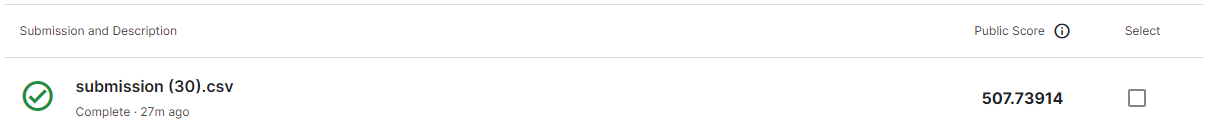
В программе: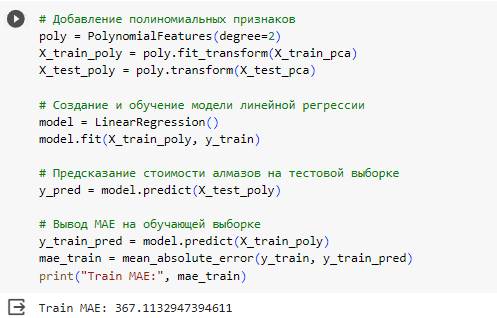


Но при этом такая же модель со степенью 3 выдает на Kaggle 652.3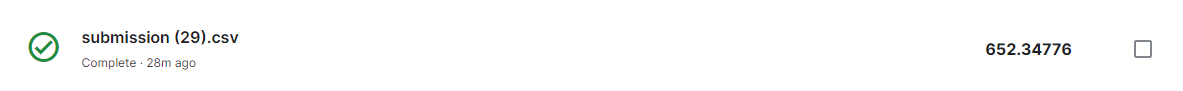
В программе: 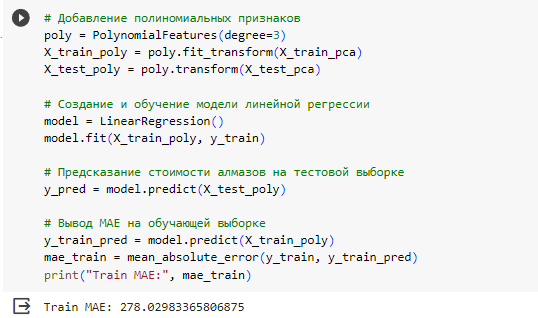

С чем это связано не имею ни малейшего понятия

#Conclusion (Выводы)

В целом можно попыаться добавить стекинг или блендинг, но я пытался и у меня получилось криво. Также имеет смысл пошаманить с использованием тех или иных признаков для улучшения результата. Также по итогу модель без регуляризации в полиномиальных признаках оказалась лучше чем с какой-либо регуляризацией.
Также я тестировал и нелинейные модели по типу деревьев, а также их градиентный бустинг. Также по хорошему использовать градиентный спуск для данной модели